In [1]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pf
from pandas_profiling import ProfileReport 
from scipy.stats import mode
%matplotlib inline
from IPython import display

In [2]:
df = pd.read_csv('census_11-2.csv')

In [3]:
pf.ProfileReport(df).to_file('census_08_new.csv.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Leeds Lane,Sian,Wright,64,Head,Single,Female,"Accountant, chartered certified",None,Catholic
1,1,Leeds Lane,Danielle,Dunn,37,None,Divorced,Female,Software engineer,None,None
2,1,Leeds Lane,Anthony,Thorpe,18,None,Single,Male,Student,None,NaN
3,2,Leeds Lane,Charlie,Cross,33,Head,Married,Male,Mental health nurse,None,Christian
4,2,Leeds Lane,Olivia,Cross,35,Wife,Married,Female,Secretary/administrator,None,Christian


In [6]:
df.isnull().sum()

House Number                        3
Street                              0
First Name                          2
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1881
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1926
dtype: int64

## Cleaning of "House Number" Column

In [7]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', nan,
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '144

In [8]:
df[df['House Number'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1553,NaN,Clarke Avenue,Jacob,Davies,71,Head,Widowed,Male,Retired Call centre manager,None,Christian
4785,NaN,Bank Lane,Richard,Webb,54,Head,Single,Male,"Engineer, manufacturing systems",None,Christian
5843,NaN,Thames Lane,Robin,Smith,64,Head,Single,Male,Futures trader,None,Christian


In [9]:
# Replacing data filled in wrong format

df['House Number'] = df['House Number'].replace('Seventy', '70')
df['House Number'] = df['House Number'].replace('One Hundred and Seven', '107')

# I changed the null values to the next house number, because i discovered the house numbers are in ascending order
df.iat[1553, 0] = '1'
df.iat[5843, 0] = '21'
df.iat[4785, 0] = '13'

# Cleaning of Firstname Column

In [10]:
df[df['First Name'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3522,138,Robinson Way,NaN,Stewart Chapman,25,Grandson,Single,Male,Animal technologist,None,None
7285,3,Grace Avenue,NaN,Claire Knowles-Hart,8,Neice,NaN,Female,Student,None,NaN


In [11]:
''' I dicovered there were two names in surmane row where null value existed in first name column, therefore I 
inferred there was error when inputing the data'''

df.iat[3522, 2 ] = 'Stewart'
df.iat[7285, 2] = 'Claire'

# Cleaning of Surname Column

In [12]:
df['Surname'].unique()

array(['Wright', 'Dunn', 'Thorpe', 'Cross', 'Hutchinson', 'Johnson',
       'Wood', 'Taylor', 'Edwards', 'Elliott', 'Lane', 'Saunders',
       'Bartlett', 'Holland', 'Davis', 'Jones', 'Reid', 'Baker',
       'Alexander', 'Francis', 'Fletcher', 'Brown', 'Turner', 'Smith',
       'Clayton-Turner', 'Hodgson', 'Green-Hodgson', 'Flynn', 'Shaw',
       'Harris', 'Tucker', 'Young', 'Whitehead', 'Clark', 'Hall',
       'Martin', 'Bates', 'Bennett', 'Lee', 'Clayton', 'Yates',
       'Robinson', 'Parry', 'Williams', 'Lloyd', 'Little', 'Wilson',
       'Russell', 'Wheeler', 'Barker', 'Bishop', 'Pearson', 'Ellis',
       'Hammond', 'Reynolds', 'Wall', 'Ward', 'Conway', 'Gardner', 'Ali',
       'Wilkinson', 'Roberts', 'Lewis', 'Holloway-Jones', 'Riley',
       'Newton', 'Harding', 'Adams', 'Burton', 'Carr', 'Burrows', 'Iqbal',
       'Cook', 'Hill', 'Lawrence', 'Matthews', 'Brooks', 'Richards',
       'Sullivan', 'Thompson', 'Barton', 'Moore', 'Godfrey', 'Akhtar',
       'Long', 'Steele', 'Foster',

In [13]:
# Checking for mispelled surnames

CheckingForMisspelledSurname = [x for x in df['Surname'] if len(x) < 2]
CheckingForMisspelledSurname

[' ', 'B', 'G', ' ', 'M', ' ']

In [14]:
# Further Checking for mispelled surnames
CheckingForMisspelledSurname2 = [x for x in df['Surname'] if x.isspace()]
CheckingForMisspelledSurname2

[' ', ' ', ' ']

### Locating row where errors occured in surname column

In [15]:
df[df['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1184,26,Dockers Road,Jayne,,38,Head,Single,Female,Records manager,None,None
5409,34,Walker Path,William,,11,Grandson,NaN,Male,Student,None,NaN
7154,162,Mace Road,Sophie,,33,Wife,Married,Female,Volunteer coordinator,None,None


In [16]:
df[df['Surname'] == 'M']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6717,4,Mace Road,Liam,M,12,Grandson,NaN,Male,Student,None,NaN


In [17]:
df[df['Surname'] == 'G']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3148,40,Robinson Way,Margaret,G,8,Daughter,NaN,Female,Student,None,NaN


In [18]:
df[df['Surname'] == 'B']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2464,14,Hazel Road,Matthew,B,3,Son,NaN,Male,Child,None,NaN


In [19]:
# Empty strings and other incomplete surnames were replaced by checking other columns such as house adress, postion in house, age etc.
df.iat[3522, 3 ] = 'Bradshaw'

df.iat[5409, 3 ] = 'Bailey'

df.iat[5409, 3 ] = 'Bailey'

df.iat[5409, 3 ] = 'Booth'

df.iat[2464, 3 ] = 'Bailey'

df.iat[3148, 3 ] = 'Gregory'

df.iat[7285, 3 ] = 'Knowles-Hart'

df.iat[3522, 3 ] = 'Chapman'

df.iat[6717, 3 ] = 'McLean'

# Cleaning of age Column

In [20]:
df['Age'].unique()

array(['64', '37', '18', '33', '35', '8', '5', '60', '61', '29', '28',
       '1', '56', '76', '24', '34', '39', '50', '59', '10', '3', '27',
       '57', '42', '23', '58', '36', '38', '40', '55', '52', '11', '19',
       '2', '15', '9', '6', '47', '16', '12', '25', '22', '21', '14', '0',
       '70', '66', '83', '80', '68', '48', '77', '46', '53', '51', '71',
       '32', '43', '20', '85', '87', '81', '92', '30', '63', '65', '49',
       '73', '88', '54', '89', '78', '82', '74', '69', '45', '31', '62',
       '17', '72', '67', '13', '4', '7', '41', '44', '75', '103', '101',
       '102', '109', '26', '86', '84', '94', '90', '79', '96', ' ', '183',
       '105', '4.5', '91', '95', '98', '60.24768262', '100', '-1', 'Four',
       'Fifty Two', '97', '5.25', 'Seventeen', '93', '63.7082276', '104',
       '86.95973188', '85.95973188', '0.3', '1.75', '108'], dtype=object)

In [21]:
# Locating age column with empty string
df[df['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1237,13,Scotland Groves,Roger,Connor,,Head,Single,Male,University Student,None,None


In [22]:
# All age writen in words are replaced in integer form
df['Age'] = df['Age'].replace('Seventeen', 17)
df['Age'] = df['Age'].replace('Fifty Two', 52)
df['Age'] = df['Age'].replace('Four', 4)
#  I assumed the child's age is 1 and -1 was a mistake
df['Age'] = df['Age'].replace('-1', 1)
#  I assumed the age  of this person is 83 since he is retired and the oldest man is 116
df['Age'] = df['Age'].replace('183', 83)
# I converted this to null to enable me calculate the mean below
# df['Age'] = df['Age'].replace(' ', None)
df.iat[1237,4] = 0


In [23]:
'''To assume a suitable able for the empty string, I got the mean of column where Realtionship 
to house hold = 'Head' and Ocuupation = student'''
y = df[(df['Relationship to Head of House'] == 'Head') & (df['Occupation'] =='University Student')]
b = [int(f) for f in y['Age']]
x = np.array( b )
total = x.sum()
mean = total/(x.size - 1)
mean

20.283464566929133

In [24]:
# Hence I asuumed a age of 20
df.iat[1237,4] = 20

In [25]:
# Convert data type from string to integer
df['Age']= [float(x) for x in df['Age']]
df['Age'] = [int(x) for x in df['Age']]

## Cleaning "Relationship to Head of House" column

In [26]:
df['Relationship to Head of House'].unique()

array(['Head', 'None', 'Wife', 'Daughter', 'Son', 'Husband', 'Lodger',
       'Cousin', 'Grandson', 'Partner', 'Visitor', 'S on',
       'Step-Daughter', 'Granddaughter', 'Neice', 'Step-Son',
       'Adopted Son', 'Sibling', 'Nephew', 'wife', 'cousin', 'Hus band',
       'Adopted Daughter', 'Adopted Grandson', 'Dau ghter', 'lodger',
       'Gran dson', 'he ad', 'Hu-sband', 'son'], dtype=object)

In [27]:
# Replacing unique value where words where spelled wrongly

df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('So n', 'Son')
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('Hus band', 'Husband')
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('Daughter', 'Daughter')
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('Gran dson', 'Grandson')
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('he ad', 'Head')
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('Hu-sband', 'Husband')
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('son', 'Son')

In [28]:
# Checking for Head of house below 18

Under18Headofhouse = df[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18)]
Under18Headofhouse

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3210,57,Robinson Way,Jessica,Price,15,Head,Married,Female,Student,None,NaN
5316,10,Walker Path,Lewis,Curtis-Reynolds,17,Head,Married,Male,Student,None,NaN
5678,7,Johnson Light,Caroline,Wall,15,Head,Married,Female,Student,None,NaN


In [29]:
df[(df['Marital Status'] == 'Married') & (df['Occupation'] == 'Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
755,37,Cancer Radial,Russell,Brown,18,Head,Married,Male,Student,None,NaN
3210,57,Robinson Way,Jessica,Price,15,Head,Married,Female,Student,None,NaN
4567,27,Brown Road,Connor,Cox,18,Head,Married,Male,Student,None,NaN
5316,10,Walker Path,Lewis,Curtis-Reynolds,17,Head,Married,Male,Student,None,NaN
5678,7,Johnson Light,Caroline,Wall,15,Head,Married,Female,Student,None,NaN
6045,22,Nottingham Drive,Emma,Stewart,18,Head,Married,Female,Student,None,NaN
6280,113,Nottingham Drive,Abbie,Richards,18,Head,Married,Female,Student,None,NaN
6315,127,Nottingham Drive,Julia,James,18,Head,Married,Female,Student,None,NaN


In [30]:
''' After filtering the data, it was observed thatt the mode value for married student who were head of house are 18 years. 
It was inferred that the married students age will be 18 years'''

df.iat[5678, 4] = 18
df.iat[5316, 4] = 18
df.iat[3210, 4] = 18


## Cleaning "Marital Status" column

In [31]:
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', nan, 'Widowed', ' '], dtype=object)

In [32]:
# Filtering out empty string in marital status column
df[df['Marital Status']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
239,6,Walsh Avenue,Brandon,Phillips,60,Head,,Male,Geophysicist/field seismologist,None,Christian
5130,2,Coventry Avenue,Jenna,Mitchell,12,Daughter,,Female,Student,None,NaN
6692,35,September Motorway,Joshua,Hopkins,62,Head,,Male,"Therapist, drama",None,Methodist


In [33]:
# Inputting data inferred to be correct
df.iat[239,6] = 'Single'
df.iat[6692,6] = 'Single'

In [34]:
# Changing nan values to NA(Not Applicable)
df['Marital Status'] = df['Marital Status'].fillna('NA')

In [35]:
S = df[(df['Marital Status'] != 'NA') & (df['Age'] < 18)]
S

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5130,2,Coventry Avenue,Jenna,Mitchell,12,Daughter,,Female,Student,None,NaN


In [36]:
df.iat[3210,6] = 'NA' # It is posible for someone less than 18 to be married without parent consent.
df.iat[5130,6] = 'NA' # Since is 12 years which is less than marriable age, there for she cannot be married.
df.iat[5316,6] = 'NA' 
df.iat[5678,6] = 'NA'

In [37]:
# Checking for persons above age 18 with NA
df[(df['Marital Status'] == 'NA') & (df['Age'] > 18)]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5767,37,Johnson Light,Annette,Cooke,21,Daughter,NA,Female,Student,None,NaN


In [38]:
# Repalcing marital status of ages above 18 from NA to single
df.iat[5767,6] = 'Single'

# Cleaning of gender column

In [39]:
df['Gender'].unique()

array(['Female', 'Male', 'F', 'Fe male', 'M'], dtype=object)

In [40]:
#  Repalcing wrongly spelled columns

df['Gender'] = df['Gender'].replace('F', 'Female')
df['Gender'] = df['Gender'].replace('M', 'Male')
df['Gender'] = df['Gender'].replace('Fe male', 'Female')

# Cleaning of Occupation Column

In [41]:
df['Occupation'].unique()

array(['Accountant, chartered certified', 'Software engineer', 'Student',
       ..., 'Microbiologist', 'Retired Engineer, production',
       'Retired Actor'], dtype=object)

In [42]:
df[df['Occupation'] ==  ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
169,64,Stanley Road,Stewart,Jones,22,Head,Married,Male,,None,None
6167,70,Nottingham Drive,Simon,Holt,52,Head,Single,Male,,None,None


In [43]:
# Filtering our data to get the mode occupation around the missing occupation
ValuesAroundAge22 = df[(df['Age'] > 50) & (df['Age'] < 55)]
ValuesAroundAge22.mode()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,15,Robinson Way,Jake,Thomas,52.0,Head,Single,Female,Unemployed,None,Christian
1,NaN,NaN,Mandy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Filtering our data to get the mode occupation round the missing occpation
ValuesAroundAge52 = df[(df['Age'] > 20) & (df['Age'] < 25)]
ValuesAroundAge52.mode()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,13,Robinson Way,Amanda,Jones,22.0,Head,Single,Female,University Student,None,None
1,NaN,NaN,Carol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Diana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Karen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Replacing the missing string with mode value of occupation around the age
df.iat[169,8] = 'University Student'
df.iat[6167,8] = 'Unemployed'

# Cleaning of infirmity

In [46]:
df['Infirmity'].unique()

array(['None', 'Physical Dis ability', 'Physical Disability', ' ',
       'Blind', 'Disabled', 'Deaf', 'Unknown Infection', 'none',
       'ment al Disability', 'Mental Disability'], dtype=object)

In [47]:
# Replacing misplled infirmities
df['Infirmity'] = df['Infirmity'].replace('Physical Dis ability', 'Physical Disability')
df['Infirmity'] = df['Infirmity'].replace('ment al Disability', 'Mental Disability')
df['Infirmity'] = df['Infirmity'].replace('none', 'None')
# Assuming empty string is None
df['Infirmity'] = df['Infirmity'].replace(' ', 'None')

# Cleaning of religion column

In [48]:
df['Religion'].unique()

array(['Catholic', 'None', nan, 'Christian', 'Muslim', 'Jewish',
       'Methodist', 'Sith', 'Sikh', 'Undecided', ' ', 'Buddist', 'Quaker',
       'Hindu', 'Pagan', 'Nope', 'Housekeeper'], dtype=object)

In [49]:
df['Religion'].mode()

0    None
dtype: object

In [50]:
df[df['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3030,4,Robinson Way,Debra,Lewis,40,Daughter,Single,Female,Mechanical engineer,None,
5690,9,Johnson Light,Rachel,Hudson,13,Daughter,NA,Female,Student,None,
5755,33,Johnson Light,Scott,Mason,14,Son,NA,Male,Student,None,


In [51]:
# Replacement of unknown religion
# Empty cells and unrecognised religions were replaced eith the mode value of religions; None.
df['Religion'] = df['Religion'].replace(' ', 'None')
df['Religion'] = df['Religion'].replace('Nope', 'None')
df['Religion'] = df['Religion'].replace('Housekeeper', 'None')
df['Religion'] = df['Religion'].replace('Nope', 'None')

''' Religion of persons below the age of 18 were replaced with "undecided" because majority of them have not decided 
their religion
at that age '''
df.loc[df['Age'] < 18, 'Religion'] = 'Undecided'
df['Religion'] = df['Religion'].fillna('None')

# Data Visualization

## Classification of age into 5-years interval

In [52]:
def age_classification(age):
    if age >=  100:
        return "99 above"
    elif age >= 95 and age < 100: 
        return "95 to 99"
    elif age >= 90 and age < 95: 
        return "90 to 94"
    elif age >= 85  and age < 90: 
        return "85 to 89"
    elif age >= 80 and age < 85: 
        return "80 to 84"
    elif age >=75  and age < 80: 
        return "75 to 79"
    elif age >= 70 and age < 75: 
        return "70 to 74"
    elif age >= 65 and age < 70: 
        return "65 to 69"
    elif age >= 60 and age < 65: 
        return "60 to 64"
    elif age >= 55 and age < 60: 
        return "55 to 59"
    elif age >= 50  and age < 55: 
        return "50 to 54"
    elif age >= 45  and age < 50: 
        return "45 to 49"
    elif age >= 40 and age < 45: 
        return "40 to 44"
    elif age >= 35 and age < 40: 
        return "35 to 39"
    elif age >= 30 and age < 35: 
        return "30 to 34"
    elif age >= 25 and age < 30: 
        return "25 to 29"
    elif age >= 20 and age < 25: 
        return "20 to 24"
    elif age >= 15 and age < 20: 
        return "15 to 19"
    elif age >= 10 and age < 15: 
        return "10 to 14"
    elif age >= 5 and age < 9: 
        return "05 to 9"
    elif age >= 0 and age < 5: 
        return "0 to 4"

In [53]:
df["Age_Classification"] = df["Age"].apply(lambda x :age_classification(x))

In [54]:
df.groupby(['Age_Classification', 'Gender']).size().reset_index(name='Gender Population')

,Age_Classification,Gender,Gender Population
0,0 to 4,Female,210
1,0 to 4,Male,208
2,05 to 9,Female,205
3,05 to 9,Male,260
4,10 to 14,Female,265
5,10 to 14,Male,276
6,15 to 19,Female,330
7,15 to 19,Male,303
8,20 to 24,Female,353
9,20 to 24,Male,283


In [55]:
NEW_DATAFRAME = pd.DataFrame({"Age": ['0 to 4',"05 to 9", "10 to 14", "15 to 19", '20 to 24',"25 to 29", "30 to 34", "35 to 39", "40 to 44", 
                                      '45 to 49',"50 to 54", "55 to 59", "60 to 64", '65 to 69',"70 to 74", "75 to 79", "80 to 84", "85 to 89", 
                                       "90 to 94", "95 to 99", "99 above"],
                              "Male": [-208, -260, -276, -303, -283, -256, -277, -317, -296, -286, -235, -216, -198, -145, -115, -75, -64, -34, -15, -10, -9],
                              "Female": [210, 205, 265, 330, 353, 288, 320, 353, 374, 344, 303, 241, 196, 166, 134, 80, 63, 43, 7, 3, 6]
                             })
Age_classes = ['99 above', '95 to 99', '90 to 94', '85 to 89', '80 to 84', '75 to 79', '70 to 74', '65 to 69', '60 to 64', '55 to 59', '50 to 54',
               '45 to 49', '40 to 44', '35 to 39', '30 to 34', '25 to 29', '20 to 24', '15 to 19', '10 to 14', '05 to 9', '0 to 4']

In [56]:
# NEW_DATAFRAME , label='Female'

C:\Users\OYETAYO ADEDAMOLA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1604: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  barfunc(barpos, self.statistic, self.width,
C:\Users\OYETAYO ADEDAMOLA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1604: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  barfunc(barpos, self.statistic, self.width,


[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

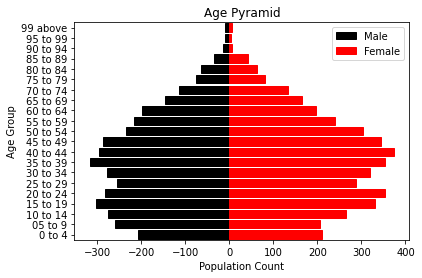

In [57]:
Ages_pyramid_plot = sns.barplot(x='Male', y='Age', data=NEW_DATAFRAME, order=Age_classes, Color=('black'), label='Male')

Ages_pyramid_plot = sns.barplot(x='Female', y='Age', data=NEW_DATAFRAME, order=Age_classes, Color=('red'), label='Female')

Ages_pyramid_plot.legend()
plt.title('Age Pyramid')
Ages_pyramid_plot.set(xlabel='Population Count', ylabel='Age Group')
# sns.set(rc={'figure.figsize':(10,7)})


## Classification of occupation into diffrent categories & visualisation

In [58]:
def occupation_category(occupation):
    if 'Student' in occupation:
        return "Student"
    elif occupation == 'Unemployed': 
        return 'Unemployed'
    elif occupation.startswith('Retired'):
        return 'Retired'
    elif occupation == 'Child':
        return "Child"
    else: 
        return "Employed" 

In [59]:
df["Occupation_Classification"] = df["Occupation"].apply(lambda x :occupation_category(x))

In [60]:
df.groupby(['Occupation_Classification']).size()

Occupation_Classification
Child          418
Employed      4472
Retired        738
Student       2126
Unemployed     528
dtype: int64

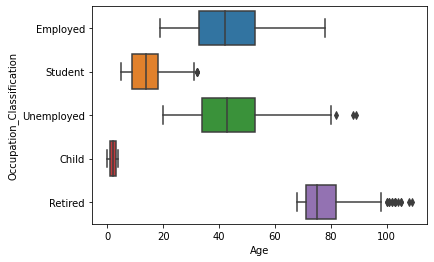

In [61]:
OccupationandAge = sns.boxplot(y="Occupation_Classification", x="Age", data=df)

## Visualisation of Infirmity column

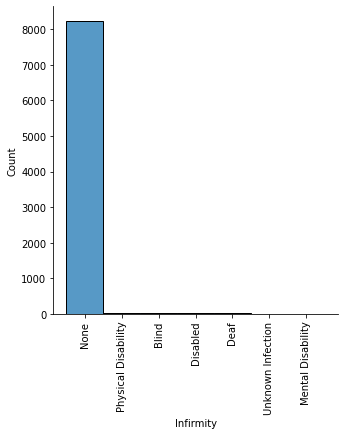

In [62]:
infirmity_plot = sns.displot(data=df, x='Infirmity')
infirmity_plot.set_xticklabels(rotation=90)
infirmity_plot

## Visualisation of Infirmity column

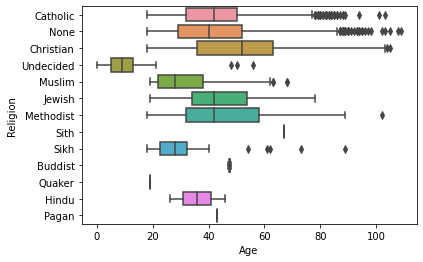

In [63]:
ReligionandAge = sns.boxplot(y="Religion", x="Age", data=df)

## Visualization of marital status accross diffrent ages

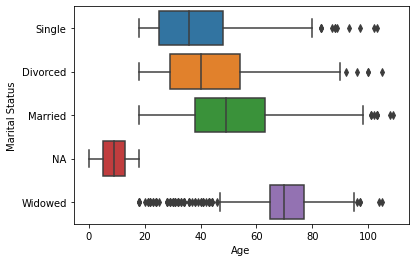

In [64]:
MaritalStatus_Age = sns.boxplot(y="Marital Status", x="Age", data=df)

## Visualisation of divorce rate

In [65]:
df.groupby(['Age_Classification', 'Gender', 'Marital Status']).size()

Age_Classification  Gender  Marital Status
0 to 4              Female  NA                210
                    Male    NA                208
05 to 9             Female  NA                205
                    Male    NA                260
10 to 14            Female  NA                265
                    Male    NA                276
15 to 19            Female  Divorced           21
                            Married            19
                            NA                175
                            Single            115
                    Male    Divorced           20
                            Married            14
                            NA                165
                            Single            100
                            Widowed             4
20 to 24            Female  Divorced           47
                            Married            40
                            Single            258
                            Widowed             8
       

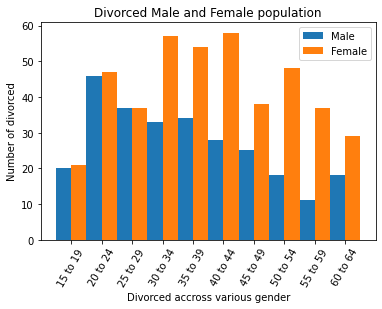

In [66]:
w=0.5
x =["15 to 19", '20 to 24',"25 to 29", "30 to 34", "35 to 39", "40 to 44", '45 to 49',"50 to 54", "55 to 59", "60 to 64"]
Female_Divorced =  [21, 47, 37, 57, 54, 58, 38, 48, 37, 29]
Male_Divorced =    [20, 46, 37, 33, 34, 28, 25, 18, 11, 18]
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1, Male_Divorced, w, label ='Male')
plt.bar(bar2, Female_Divorced, w, label ='Female')
plt.xlabel('Divorced accross various gender')
plt.ylabel('Number of divorced')
plt.xticks(bar1+0.25, x, rotation= 60)
plt.title('Divorced Male and Female population')
plt.legend()
plt.show()

## Visualisation of migration

In [67]:
AgeGroupsPopulation = df.groupby(['Age_Classification']).size().sort_index(ascending=True)
AgeGroupsPopulationUp1Step = AgeGroupsPopulation.shift(-1)
DiffrenceAcrossAgegroups = AgeGroupsPopulationUp1Step - AgeGroupsPopulation 
DiffrenceAcrossAgegroups.reset_index(name='Migration')

,Age_Classification,Migration
0,0 to 4,47.0
1,05 to 9,76.0
2,10 to 14,92.0
3,15 to 19,3.0
4,20 to 24,-92.0
5,25 to 29,53.0
6,30 to 34,73.0
7,35 to 39,0.0
8,40 to 44,-40.0
9,45 to 49,-92.0


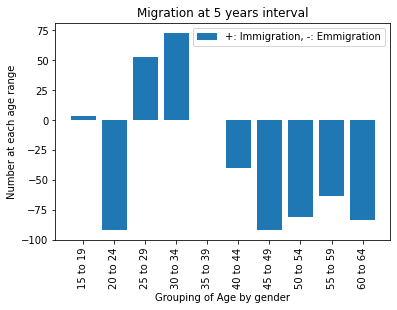

In [68]:

w=0.8
x =["15 to 19", '20 to 24',"25 to 29", "30 to 34", "35 to 39", "40 to 44", '45 to 49', "50 to 54", "55 to 59", "60 to 64"]
Migration = [3.0, -92.0, 53.0, 73.0, 0.0, -40.0, -92.0, -81.0, -63.0, -83.0]
bar1 = np.arange(len(x))
plt.bar(bar1, Migration, w, label ='+: Immigration, -: Emmigration')
plt.xlabel('Grouping of Age by gender')
plt.ylabel('Number at each age range')
plt.xticks(bar1, x, rotation= 90)
plt.title('Migration at 5 years interval')
plt.legend()
plt.show()

In [69]:

Age25to29 = df[(df['Age'] > 20) & (df['Age'] < 25)]
Age25to29['Marital Status'].mode()


0    Single
dtype: object

In [70]:
Age30to34 = df[(df['Age'] > 29) & (df['Age'] < 35)]
print('Mode value of ages betwwen 30 and 34')
Age30to34['Occupation_Classification'].mode()

Mode value of ages betwwen 30 and 34


0    Employed
dtype: object

# Analysis of Census Record

## Crude Birth Rate

![alt text](crudebirthrate.png "Title")

In [71]:
age0 = len(df[df['Age'] == 0])
age4 = len(df[df['Age'] == 4])
age8 = len(df[df['Age'] == 8])
age12 = len(df[df['Age'] == 12])
totalPopulation = len(df)

In [72]:
CBR = (age0/totalPopulation) * 1000
print(f'Crude Birth Rate Per thousand = {CBR}')

Crude Birth Rate Per thousand = 8.814296063752716


In [73]:
CBR4 = (age4/totalPopulation) * 1000
CBR8 = (age8/totalPopulation) * 1000
CBR12 = (age12/totalPopulation) * 1000

print(f'Crude Birth Rate Per thousand at age 4 = {CBR4}')
print(f'Crude Birth Rate Per thousand at age 8 = {CBR8}')


Crude Birth Rate Per thousand at age 4 = 11.712146824438541
Crude Birth Rate Per thousand at age 8 = 13.644047331562424


## Age specific Fertility rate

![alt text](ASFR.png "Title")

In [74]:
agebtw2529 = (df['Age'].between(25,29)) & (df['Gender'] == 'Female')
agebtw3034 = (df['Age'].between(30,34)) & (df['Gender'] == 'Female')
agebtw3539 = (df['Age'].between(35,39)) & (df['Gender'] == 'Female')
agebtw4044 = (df['Age'].between(40,44)) & (df['Gender'] == 'Female')

In [75]:
asfr25to29 = (age0/len(df[agebtw2529]))*1000
asfr30to34 = (age4/len(df[agebtw3034]))*1000
asfr35to39 = (age8/len(df[agebtw3539]))*1000
asfr40to44 = (age8/len(df[agebtw4044]))*1000

print(f"ASFR 25-29 per 1000 {asfr25to29}")
print(f"ASFR 30-34 per 1000 {asfr30to34}")
print(f"ASFR 35-40 per 1000 {asfr40to44}")
print(f"ASFR 40-44 per 1000 {asfr40to44}")

ASFR 25-29 per 1000 253.4722222222222
ASFR 30-34 per 1000 303.125
ASFR 35-40 per 1000 302.13903743315507
ASFR 40-44 per 1000 302.13903743315507


## General fertility rate

![alt text](GFRL.png "Title")

In [76]:
SumOfBirths = age0 + age4 + age8 + age12
SumOfChildberaingWomen = len(agebtw2529)+ len(agebtw3034) + len(agebtw3539) + len(agebtw4044)

GFR = (SumOfBirths/SumOfChildberaingWomen) * 1000

print(f"General Fertility Rate: {GFR}")

General Fertility Rate: 11.531031151895677


## Crude Death Rate

![alt text](CDR.png "Title")

In [77]:
# SizeOfAgesAbove66
SizeOfAgesAbove66 = df[df['Age'].between(66,116)].groupby('Age').size().sort_index(ascending=False)

In [78]:
# moving the size of ages up one step to enable diffrence between two age sizes to be calculated
AgesUpOneStep = SizeOfAgesAbove66.shift(-1)

In [79]:
# Diffrence between preceeding ages

Difference = SizeOfAgesAbove66 - AgesUpOneStep

# change it to a dataframe...

Difference = Difference.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want minus counts only

Mortality = Difference[Difference['Count'] < 0]
# Mortality

In [80]:
DeathRate = abs(((Mortality['Count'])).sum()/totalPopulation)*1000
DeathRate

14.972228930210093

## Crude Growth Rate

![alt text](CGR.png "Title")

In [81]:
print(f"CGR {CBR - DeathRate}")
print(f"CGR as Percentage {(CBR - DeathRate)/10}%")

CGR -6.157932866457378
CGR as Percentage -0.6157932866457377%


## Population Change

![alt text](PopulationChange.png "Title")

In [82]:
# I assumed most migration will be between 18 and 65 years
SizeOfAgesbtw18and66 = df[df['Age'].between(18,65)].groupby('Age').size().sort_index(ascending=False)

In [83]:
AgesOneStepUp = SizeOfAgesbtw18and66.shift(-1)

In [84]:
# Diffrence between preceeding ages

Difference = SizeOfAgesbtw18and66 - AgesOneStepUp

# change it to a dataframe...

Difference = Difference.reset_index(name='Count')
# I assumed negative diffrence in population is Emigration and positive diffrence is migration
Emmigration = Difference[Difference['Count'] < 0] 
Immigration = Difference[Difference['Count'] > 0]

In [85]:
TotalEmmigration = abs(Emmigration['Count'].sum())
TotalEmmigration

303.0

In [86]:
TotalImmigration = Immigration['Count'].sum()
TotalImmigration

227.0

In [87]:
PopulationChange = (CBR + TotalImmigration) - (DeathRate + TotalEmmigration)
PopulationChange

-82.1579328664574

In [88]:
occupancyrate = df.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')


In [89]:
occupancyrate['Occupancy Count'].median()

2.0

In [90]:
k = occupancyrate[occupancyrate['Occupancy Count'] > 2]
len(k)

1316

In [91]:
dfMergeOccupancyrate = pd.merge(df,occupancyrate)

In [92]:
dfMergeOccupancyrate.groupby("Occupancy Count")["Age"].apply(lambda x: mode(x)[0][0]).reset_index()

,Occupancy Count,Age
0,1,71
1,2,39
2,3,41
3,4,5
4,5,19
5,6,3
6,7,5
7,8,12
8,9,18
9,10,34
